In [1]:
%matplotlib inline

# plot_learning_curves: Plot learning curves from training and test sets

A function to plot learning curves for classifiers. Learning curves are extremely useful to analyze if a model is suffering from over- or under-fitting (high variance or high bias). The function can be imported via


> from mlxtend.plotting import plot_learning_curves

This function uses the traditional holdout method based on a training and a test (or validation) set. The test set is kept constant while the size of the training set is increased gradually. The model is fit on the training set (of varying size) and evaluated on the same test set.

The learning curve can be used as follows to diagnose overfitting:

- If there is a large gap between the training and test performance, then the model is likely suffering from overfitting.
- If both the training and test error are very large, the model is likely underfitting the data.

The learning curve can also be used to judge whether collecting more data can be useful. More about that in Example 1 below.

### References

-

## Example 1

The following code illustrates how we can construct a learning curve for a 5000-sample subset of the MNIST dataset. 4000 examples are used for training, and 1000 examples are reserved for testing.

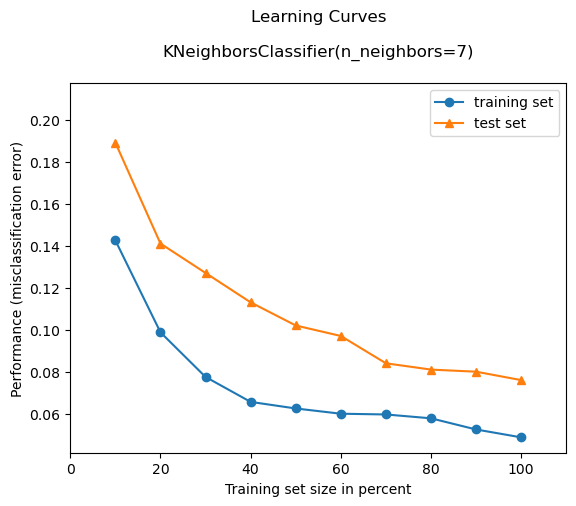

In [2]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


# Loading some example data
X, y = mnist_data()
X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=123)
X_train, X_test = X[:4000], X[4000:]
y_train, y_test = y[:4000], y[4000:]

clf = KNeighborsClassifier(n_neighbors=7)

plot_learning_curves(X_train, y_train, X_test, y_test, clf)
plt.show()

As we can see from the plot above, the KNN model could benefit from additional training data. I.e., the slope indicates that if we had a larger training set, the test set error might decrease further. 

Also, based on the gap between training and test set performance, the model overfits slightly. This could pontentially be addressed by increasing the number of neighbors (`n_neighbors`) in KNN. 

While it is not relevant for analyzing the performance of the classifier, the region ~20% training set size shows that the model is underfitting (large training and test error), which is probably due to the small dataset size.

## API

In [3]:
with open('../../api_modules/mlxtend.plotting/plot_learning_curves.md', 'r') as f:
    print(f.read())

## plot_learning_curves

*plot_learning_curves(X_train, y_train, X_test, y_test, clf, train_marker='o', test_marker='^', scoring='misclassification error', suppress_plot=False, print_model=True, title_fontsize=12, style='default', legend_loc='best')*

Plots learning curves of a classifier.

**Parameters**

- `X_train` : array-like, shape = [n_samples, n_features]

    Feature matrix of the training dataset.

- `y_train` : array-like, shape = [n_samples]

    True class labels of the training dataset.

- `X_test` : array-like, shape = [n_samples, n_features]

    Feature matrix of the test dataset.

- `y_test` : array-like, shape = [n_samples]

    True class labels of the test dataset.

- `clf` : Classifier object. Must have a .predict .fit method.


- `train_marker` : str (default: 'o')

    Marker for the training set line plot.

- `test_marker` : str (default: '^')

    Marker for the test set line plot.

- `scoring` : str (default: 'misclassification error')

    If not 'misclassif